<center> <b> <span style="font-size:24px;"> FINA 4335 <b> <center>
<center><span style="font-size:22px;"><b>Homework Assignment 2<b></span></center>
<center><span style="font-size:22px;"><b>Due date: 10/20/2024 11:59 ET</b></span></center>

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

## Instructions

1. Please rename the notebook. It should have the following format: **HW2_LastName_FirstName**, where LastName and FirstName are your last name and first name, respectively.
1. Please enter your first name, your last name, and your student id number in the dedicated cell.
1. Use your code or function on a variety of inputs to test that it works like you'd like it to. But the submitted result should be free of any code other than those that are specifically asked for.
1. Write your code in the specific cells.
1. After you answer all questions:
    1. Restart your kernel and run all cells
    1. Save your notebook and export your notebook as HTML
    1. Submit your **notebook** and **HTML** to Canvas, under Homework Assignments --> HW2.
       1. Failure to submit the HTML file  (with all outputs) will result in up to <span style="color: red;">20% grade deduction</span>.

**Note**:
- Name the variables exactly as requested. Python is **case-sensitive**, so `df` and `DF` are different variables
- Always **use code rather than eyeballing or manual calculations** to answer questions
- Write your code in a **smart and efficient** way
  - Inefficient code will be subject to grade deduction
- Include sufficient **comments** on your code
  - Failure to include sufficient comments will result in a 10 points grade deduction
- Use the most recent code version and make sure the output is free of warnings
  - Code warnings will be subject to grade deduction
- You may **restart kernel and clear output** occasionally to prevent unexpected results
- Use the methods **covered in modules 1-6**. Using methods not taught in the course receives up to <span style="color: red;">20% of grade penalty</span>
- There are <span style="color: red;">**embedded images** in this file. If you are unable to view the images in Jupyter Lab, you may <span style="color: red;">view them in the corresponding HTML file</span>.
- There will be much less hints in the midterm exam. Further, passing the 'Evaluation' cells does not guarantee full credit.




## Please enter your information here:¶
##### First Name: Simrin
##### Last Name: Ramchandani
##### Student ID Number: 001506072

# Part 1: Firm fundamentals
<span style="font-size:18px;">
    
In this part of the assignment, you will analyze financial statement data for all companies listed in [Compustat](https://www.marketplace.spglobal.com/en/datasets/compustat-financials-(8)) from January 2019 to early 2024. Compustat data is accessed through Wharton Research Data Services. Your main task is to calculate several profitability and efficiency ratios for the companies and then aggregate them at the industry-month level.

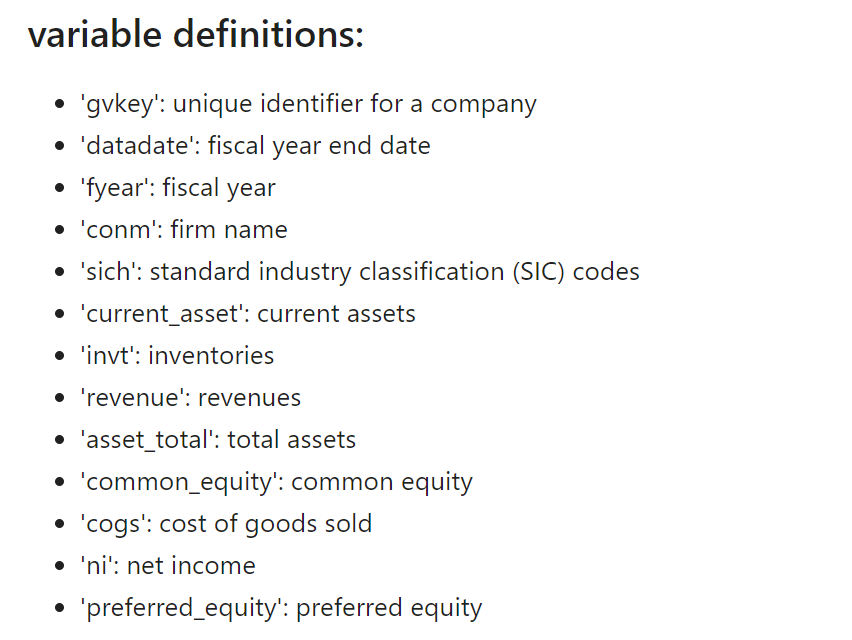

## Question 1 (5 points)

Create a DataFrame named  `funda` by reading in the columns labeled 'gvkey','datadate','fyear', 'conm', 'sich', 'current_asset', 'asset_total' , 'invt','common_equity','revenue',  'cogs', 'ni', and 'preferred_equity', from the file `comp_funda_HW.csv`. 

Next,  remove rows (in-place) when these columns are missing: total assets, common equity, revenues, and SIC code.

In [2]:
# read CSV file and select columns
funda=pd.read_csv("comp_funda_HW.csv", 
                  usecols = ['gvkey','datadate','fyear', 'conm', 'sich', 'current_asset', 'asset_total',
                  'invt','common_equity','revenue', 'cogs', 'ni', 'preferred_equity'], 
                  parse_dates=['datadate'])

# remove rows with missing values in specific columns
funda.dropna(subset=['asset_total','common_equity','revenue','sich'],inplace=True)

# show first few rows of data
funda.head()

,gvkey,datadate,fyear,conm,current_asset,asset_total,common_equity,cogs,invt,ni,revenue,sich,preferred_equity
0,1004,2019-05-31,2018.0,AAR CORP,952.5,1517.2,905.9,1679.5,589.0,7.5,2051.8,5080.0,0.0
1,1004,2020-05-31,2019.0,AAR CORP,1438.7,2079.0,902.6,1728.7,692.7,4.4,2089.3,5080.0,0.0
2,1004,2021-05-31,2020.0,AAR CORP,937.0,1539.7,974.4,1364.6,591.0,35.8,1651.4,5080.0,0.0
3,1004,2022-05-31,2021.0,AAR CORP,1007.2,1573.9,1034.5,1470.3,604.1,78.7,1817.1,5080.0,0.0
4,1004,2023-05-31,2022.0,AAR CORP,1097.9,1833.1,1099.1,1591.3,624.7,90.2,1990.6,5080.0,0.0


In [3]:
# Evaluation (do no change this cell)
#funda.shape
print(funda.shape==(34212, 13))

True


## Question 2 (5 points)
In  `funda` , drop rows when there are duplicated 'gvkey' and **calendar** year of 'datadate' (keep the last observation).  Next, sort `funda` by  the two columns 'gvkey' and 'datadate'. 

In [4]:
# create year column using datadate
funda['year']=funda['datadate'].dt.year

# drop duplicates based on gvkey and year coolumns, keeping last observation
funda.drop_duplicates(subset=['gvkey','year'],keep='last',inplace=True)

# sort data by gvkey and datadate
funda.sort_values(by=['gvkey','datadate'],inplace=True)

# remove temporary year column
del funda['year']

In [5]:
# Evaluation (do no change this cell)
print(funda.shape[0]<34212) # this must be true 
#print(funda['year'])
print(funda.loc[3,'current_asset']==1007.2)
funda.head()

True
True


,gvkey,datadate,fyear,conm,current_asset,asset_total,common_equity,cogs,invt,ni,revenue,sich,preferred_equity
0,1004,2019-05-31,2018.0,AAR CORP,952.5,1517.2,905.9,1679.5,589.0,7.5,2051.8,5080.0,0.0
1,1004,2020-05-31,2019.0,AAR CORP,1438.7,2079.0,902.6,1728.7,692.7,4.4,2089.3,5080.0,0.0
2,1004,2021-05-31,2020.0,AAR CORP,937.0,1539.7,974.4,1364.6,591.0,35.8,1651.4,5080.0,0.0
3,1004,2022-05-31,2021.0,AAR CORP,1007.2,1573.9,1034.5,1470.3,604.1,78.7,1817.1,5080.0,0.0
4,1004,2023-05-31,2022.0,AAR CORP,1097.9,1833.1,1099.1,1591.3,624.7,90.2,1990.6,5080.0,0.0


## Question 3: Explore the data: (10 points)
3.1) Identify the company name and fiscal year for the company that has the highest total revenue in `funda`. Save the object as `highest_rev`.

3.2) Identify the company name and fiscal year for the company that has the largest net income in  `funda`. Save the object as `highest_ni`.

3.3) Find the unique number of firms  in `funda`. Save the object as `n_firms`.

Print the output of 3.1)-3.3).

3.4) Filter firms that have occurred net losses in both fiscal years 2022 and 2023, then save the filtered data in a DataFrame named `funda_loss_2223`. Next, print the 3rd to 7th rows of `funda_loss_2223`.


In [6]:
# 3.1 Find the the company name and fiscal year for the company that has the largest revenues in funda
highest_rev=funda[['conm','fyear']].loc[funda['revenue'].idxmax()]
print("Highest Revenue:",highest_rev)

Highest Revenue: conm     WALMART INC
fyear         2023.0
Name: 4418, dtype: object


In [7]:
# 3.2 Find the the company name and fiscal year for the company that has the largest net income in funda
highest_ni=funda[['conm','fyear',]].loc[funda['ni'].idxmax()]
print('Highest Net Income:',highest_ni)

Highest Net Income: conm     APPLE INC
fyear       2022.0
Name: 318, dtype: object


In [8]:
# 3.3 Find the unique number of firms in funda
n_firms=funda['gvkey'].nunique()
print("Number of Unique Firms:",n_firms)

Number of Unique Firms: 8158


In [9]:
# 3.4 Filter firms that have occured net losses in 2022 and 2023


# filter for firms with net losses in 2022 and 2023
funda_2022 = funda[(funda['fyear'] == 2022) & (funda['ni'] < 0)]
funda_2023 = funda[(funda['fyear'] == 2023) & (funda['ni'] < 0)]

# Merge firms that appear in both years (I learned this DS2500, wasn't sure how to do it a different way)
funda_loss_2223 = funda_2022.merge(funda_2023, on='gvkey', suffixes=('_2022', '_2023'))

# Display the 3rd to 7th rows
print(funda_loss_2223.iloc[2:8])

   gvkey datadate_2022  fyear_2022                 conm_2022  \
2   1272    2022-06-30      2022.0             PETRO USA INC   
3   1397    2022-12-31      2022.0     AMERICAN BILTRITE INC   
4   1661    2022-12-31      2022.0     NABORS INDUSTRIES LTD   
5   1823    2022-12-31      2022.0            ASTRONICS CORP   
6   2109    2022-06-30      2022.0         SPARX HLDGS GROUP   
7   2220    2022-12-31      2022.0  BIO-RAD LABORATORIES INC   

   current_asset_2022  asset_total_2022  common_equity_2022  cogs_2022  \
2               0.000             0.000              -0.105      0.000   
3              75.295           124.413              26.132    140.272   
4            1000.623          4729.854             368.956   1666.004   
5             365.294           615.031             239.920    442.516   
6               0.000             0.000               0.000      0.000   
7            3157.976         13501.666            9615.252   1103.771   

   invt_2022   ni_2022  ...     

In [10]:
# Evaluation (do no change this cell)
print("3.1: firm-year with the largest revenue", '\n', highest_rev)
print("3.2: firm-year with the largest NI",'\n', highest_ni)
print(n_firms>7900)
print("Make sure you print the output of 3.1)-3.3).")
print('Always remember to read the questions carefully;', '\n'
       'passing Evaluation cells (no matter return Trues or Falses)','\n',
        'does not guarantee full credit')

3.1: firm-year with the largest revenue 
 conm     WALMART INC
fyear         2023.0
Name: 4418, dtype: object
3.2: firm-year with the largest NI 
 conm     APPLE INC
fyear       2022.0
Name: 318, dtype: object
True
Make sure you print the output of 3.1)-3.3).
Always remember to read the questions carefully; 
passing Evaluation cells (no matter return Trues or Falses) 
 does not guarantee full credit


## Question 4 (5 points)

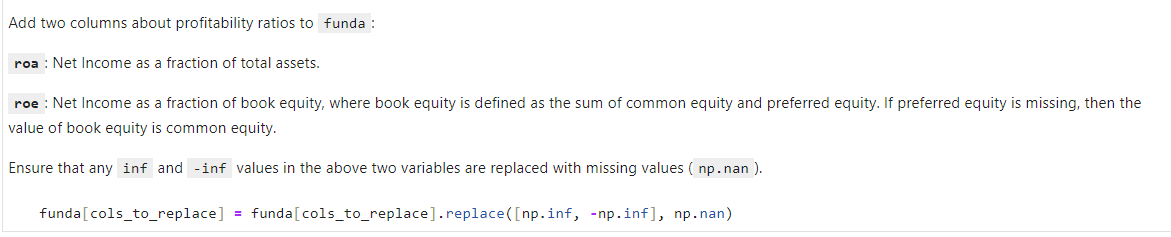

In [11]:
# Create roa column
funda['roa'] = funda['ni'] / funda['asset_total']\

# Create roe column
funda['roe'] = funda['ni'] / (funda['common_equity'] + funda['preferred_equity'].fillna(0))
funda[['roa','roe']] =funda[['roa','roe']].replace([np.inf, -np.inf], np.nan)

In [12]:
# Evaluation (do no change this cell)
summ1=funda[['roa','roe']].describe()
print(summ1.loc['mean','roe']<0.25)
print(summ1)

True
                roa           roe
count  34056.000000  34173.000000
mean      -1.930258      0.249745
std      129.885059     49.618326
min   -15612.600000  -1968.000000
25%       -0.191594     -0.215259
50%        0.005185      0.054153
75%        0.043792      0.158509
max    13583.000000   7322.142857


## Question 5 (5 points)

Add the column `roa_adjusted` to `funda`, where 
**`roa_adjusted`** is ROA minus the average ROA of companies in the same industry (`sich`) for the same **fiscal** year.

In [13]:
# define a function called adjusted
def adjusted(x):
    ''' 
    Adjusts values in a Series by subtracting the median.
    Parameters: 
    x(pd.Series): A pandas Series that has numerical values that can be adjusted
    Returns:
    pd.Series: A pandas Series with adjusted values, and each value is the original
    values minus the median of the Series
    ''' 
    # subtracts median from each value in Series
    x_adj=x-x.median()
    return x_adj   
    
# apply this function on specific columns
funda[['roa_adjusted','roe_adjusted']]=funda[['roa', 'roe']].apply(adjusted)


In [14]:
# Evaluation (do no change this cell)
funda['roa_adjusted'].describe()

count    3.405600e+04
mean    -1.935442e+00
std      1.298851e+02
min     -1.561261e+04
25%     -1.967788e-01
50%     -4.336809e-19
75%      3.860741e-02
max      1.358299e+04
Name: roa_adjusted, dtype: float64

## Question 6 (10 points)

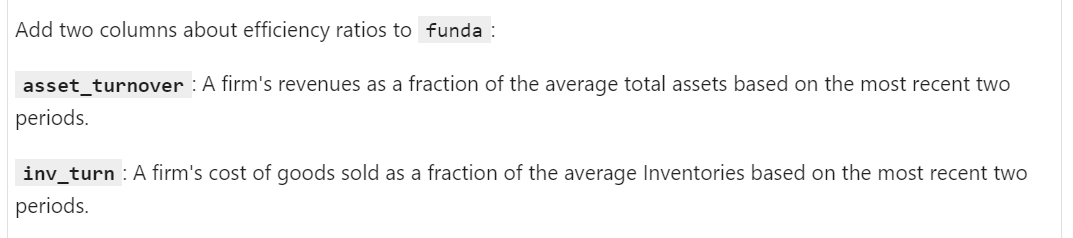

For example,

AAR CORP's value for `asset_turnover` on 2019-05-31 is:

$$
\text{asset\_turnover} = \frac{2051.8}{1517.2}
$$

AAR CORP's value for `asset_turnover` on 2023-05-31 is calculated as:

$$
\text{asset\_turnover} = \frac{1990.6}{\left(\frac{1833.1 + 1573.9}{2}\right)}
$$

To understand these numbers, you need to print the head of the data.

Ensure that any `inf` and `-inf` values in the above two variables are replaced with missing values (`np.nan`).

In [15]:
# make sure the data is sorted by gvkey and datadate
funda.sort_values(by=['gvkey', 'datadate'], inplace=True)

# calculate previous total assets and inventories 
funda['prev_asset_total'] = funda.groupby('gvkey')['asset_total'].shift(1)
funda['prev_invt'] = funda.groupby('gvkey')['invt'].shift(1)

funda['avg_asset_total'] = (funda['asset_total'] + funda['prev_asset_total']) / 2
funda['avg_invt'] = (funda['invt'] + funda['prev_invt']) / 2

# calculate asset turnover
funda['asset_turnover'] = funda['revenue'] / funda['avg_asset_total']

# calculate inventory turnover
funda['inv_turn'] = funda['cogs'] / funda['avg_invt']

# replace inf and -inf values with np.nan
funda[['asset_turnover', 'inv_turn']] = funda[['asset_turnover', 'inv_turn']].replace([np.inf, -np.inf], np.nan)

funda.head()

,gvkey,datadate,fyear,conm,current_asset,asset_total,common_equity,cogs,invt,ni,...,roa,roe,roa_adjusted,roe_adjusted,prev_asset_total,prev_invt,avg_asset_total,avg_invt,asset_turnover,inv_turn
0,1004,2019-05-31,2018.0,AAR CORP,952.5,1517.2,905.9,1679.5,589.0,7.5,...,0.004943,0.008279,-0.000241,-0.045874,NaN,NaN,NaN,NaN,NaN,NaN
1,1004,2020-05-31,2019.0,AAR CORP,1438.7,2079.0,902.6,1728.7,692.7,4.4,...,0.002116,0.004875,-0.003068,-0.049278,1517.2,589.0,1798.10,640.85,1.161949,2.697511
2,1004,2021-05-31,2020.0,AAR CORP,937.0,1539.7,974.4,1364.6,591.0,35.8,...,0.023251,0.036741,0.018066,-0.017413,2079.0,692.7,1809.35,641.85,0.912703,2.126042
3,1004,2022-05-31,2021.0,AAR CORP,1007.2,1573.9,1034.5,1470.3,604.1,78.7,...,0.050003,0.076075,0.044818,0.021922,1539.7,591.0,1556.80,597.55,1.167202,2.460547
4,1004,2023-05-31,2022.0,AAR CORP,1097.9,1833.1,1099.1,1591.3,624.7,90.2,...,0.049206,0.082067,0.044021,0.027914,1573.9,604.1,1703.50,614.40,1.168535,2.590007


In [16]:
# Evaluation (do no change this cell)
summ6=funda[['asset_turnover','inv_turn']].describe()
print(summ6)

       asset_turnover       inv_turn
count    25977.000000   15915.000000
mean         0.608570      87.430042
std          2.104298    4319.949946
min         -0.762022     -47.761702
25%          0.077482       2.397972
50%          0.388494       4.962570
75%          0.819630      13.994272
max        311.657143  535771.384615


## Question 7 (5 points)

For each year, list the two firms that have the largest gross profit margin ( revenues minus cost of goods sold, then divided by revenues). Keep the results in a dataframe named `top2_pm_by_year`, which should include the following columns 'fyear',  'conm', and 'gross_profit_margin' (which represents profit margin for that company) 

Ensure that any `inf` and `-inf` values in gross profit margin are replaced with missing values (`np.nan`).

In [17]:

# calculate gross profit margin
funda['gross_profit_margin'] = (funda['revenue'] - funda['cogs']) / funda['revenue']

# replace inf and -inf values with np.nan
funda['gross_profit_margin'] = funda['gross_profit_margin'].replace([np.inf, -np.inf], np.nan)

# sort the DataFrame by fiscal year and gross profit margin
funda_sorted = funda.sort_values(by=['fyear', 'gross_profit_margin'], ascending=[True, False])

# get the top 2 firms for each year
top2_pm_by_year = funda_sorted.groupby('fyear').head(2)[['fyear', 'conm', 'gross_profit_margin']]


In [18]:
# Evaluation (do no change this cell)
print(top2_pm_by_year.shape!=(12,3))
print(top2_pm_by_year[top2_pm_by_year['conm']=='LIPOCINE INC'])
top2_pm_by_year.head()

False
       fyear          conm  gross_profit_margin
8681  2023.0  LIPOCINE INC               6.2792


,fyear,conm,gross_profit_margin
15325,2018.0,GLOBAL GAMING TECHNOLOGIES,1.765035
2666,2018.0,MESABI TRUST,1.000000
57995,2019.0,FIRSTHAND TECHNOLOGY VALU FD,3.601676
28437,2019.0,ROYALTY PHARMA PLC,1.459057
42099,2020.0,ZOOMAWAY TECHNOLOGIES INC,388.666667


## Question 8 (5 points)
Run the below cell of code to: 

Add the column `sich1` to `funda`, where `sich1` is the first  digit of `sich`. 
Add the column `conm_short` to `funda`, where `conm_short` is the first  6 characters of `conm`. 

In [19]:
# Converts the 'sich' column to a nullable integer type (Int64) using pandas.
funda['sich']=funda['sich'].astype(pd.Int64Dtype())
# Converts the 'sich' column to a string, extracts the first character 
# [:1], and then converts it back to an integer.
funda['sich1']=funda['sich'].astype(str).str[:1].astype(int)
# continue your code here 
funda['conm_short']=funda['conm'].str[:6]

In [20]:
# Evaluation (do no change this cell)
print("You will not use 'conm_short' in subsequent questions, however, ")
print('One goal of this question is to learn about how to obtain the first \n', 
       'N strings from a column')
print('________________________________________________________________________')
print(funda[['sich','sich1','conm_short']].tail())
funda[['sich','sich1','conm_short']].describe()

You will not use 'conm_short' in subsequent questions, however, 
One goal of this question is to learn about how to obtain the first 
 N strings from a column
________________________________________________________________________
       sich  sich1 conm_short
60865  3621      3     ACCELL
60868  5812      5     SUPER 
60869  5812      5     SUPER 
60870  6141      6     JOINT 
60871  6141      6     JOINT 


,sich,sich1
count,34195.0,34195.000000
mean,4823.275303,4.299898
std,2095.506443,2.150447
min,100.0,1.000000
25%,2836.0,2.000000
50%,4841.0,4.000000
75%,6512.0,6.000000
max,9997.0,9.000000


## Question 9 (5 points)
For each industry (`sich1`), find the average and median of these two financial ratios: asset turnover and ROA. The results should be stored in a dataframe named `ind_ratio`.

In [21]:
# calculate the average and median for asset turnover and ROA grouped by 'sich1'
ind_ratio = funda.groupby('sich1').agg(
    avg_asset_turnover=('asset_turnover', 'mean'),
    median_asset_turnover=('asset_turnover', 'median'),
    avg_roa=('roa', 'mean'),
    median_roa=('roa', 'median')).reset_index()

In [22]:
# Evaluation (do no change this cell)
ind_ratio.head()

,sich1,avg_asset_turnover,median_asset_turnover,avg_roa,median_roa
0,1,0.505944,0.380194,-1.757645,-0.016022
1,2,0.444634,0.208417,-5.954918,-0.265036
2,3,0.745462,0.692551,-3.038666,0.005153
3,4,0.515004,0.304670,-0.120826,0.026185
4,5,1.594668,1.374995,-0.222683,0.028124


## Question 10 (10 points)

For each industry (indicated by the first 1 digit of SIC code) and year-month of the  fiscal year-end (`datadate`), find the average value of asset turnover.
- Note: the fiscal year-end of a firm may not be the last day of that month. 

Next, create a dataframe `asset_turnover_wide`, which is indexed by  the year-month of  `datadate`, and the column names are each industry (1 to 9), the values for each column are the average asset turnover for that industry. You should delete rows when all the columns are missing.





In [23]:
# get year and month
funda['year_month'] = funda['datadate'].dt.to_period('M')

# group by 'sich1' and 'year_month', then calculate the average asset turnover
asset_turnover_grouped = funda.groupby(['sich1', 'year_month'])['asset_turnover'].mean().reset_index()

# create a DataFrame with year_month as index and columns as industries
asset_turnover_wide = asset_turnover_grouped

# remove rows where all values are missing
asset_turnover_wide.dropna(how='all', inplace=True)

In [24]:
# Evaluation (do no change this cell)
print(asset_turnover_wide.shape==(65,9))
print(asset_turnover_wide.head())
print('                              ')
asset_turnover_wide.iloc[:,-3:].describe()

False
   sich1 year_month  asset_turnover
0      1    2019-01             NaN
1      1    2019-02             NaN
2      1    2019-03             NaN
3      1    2019-04             NaN
4      1    2019-05             NaN
                              


,sich1,asset_turnover
count,547.000000,436.000000
mean,4.893967,0.783076
std,2.548378,0.601649
min,1.000000,0.000000
25%,3.000000,0.382792
50%,5.000000,0.690662
75%,7.000000,0.980885
max,9.000000,4.169389


## Question 11 (5 points)

Create a function `industry_ratio`, where the parameters are:

`dataframe`: a dataframe that contains firm level financial ratios for multiple years. Its value should be  `funda` by default. \
`ratio`: a string, it is the column name for a financial ratio\
`datadate`: a string, the column name for fiscal year end date \
`sic_id`: a string, the column name for the industry classification code 

The function should return a time-series dataframe, which should be indexed by the year month of fiscal year-end, and the column names are each industry (indicated by the first 1 digit of SIC code), the values for each column should be the average financial ratio for that industry. 

In [25]:
def industry_ratio(ratio,datadate, sic_id,dataframe=funda):
    """
    Calculates the average financial ratio for each industry (based on SIC code) and fiscal
    year-end(datadate)

    Parameters:
    dataframe: a dataframe that contains firm level financial ratios for multiple years. Its value should be  `funda` by default.
    
    ratio: a string, it is the column name for a financial ratio
    
    datadate: a string, the column name for fiscal year end date 
    
    sic_id: a string, the column name for the industry classification code 

    Returns:
    pd.Dataframe: a time-series Dataframe that is indexed by the year month of fiscal year-end
    and the columns names are each industry and average financial ratio for that industry
    """
    # convert to year-month format
    dataframe['year_month'] = dataframe[datadate].dt.to_period('M')
    
    # group by sich nd year-month, calculate the average ratio
    industry_grouped = dataframe.groupby([sic_id, 'year_month'])[ratio].mean().reset_index()
    
    # create pivot table
    means_wide = industry_grouped.pivot(index='year_month', columns=sic_id, values=ratio)
    
    # remove rows where all values are missing
    means_wide.dropna(how='all', inplace=True)
    
    
    return means_wide

In [26]:
# Evaluation (do not change this cell)
asset_turnover_wide_v2=industry_ratio( 'asset_turnover','datadate', 'sich1',funda)
print(asset_turnover_wide_v2.shape==asset_turnover_wide.shape)
asset_turnover_wide_v2.head()

False


sich1,1,2,3,4,5,6,7,8,9
year_month,,,,,,,,,
2020-01,0.477454,1.169273,0.855350,1.906842,1.732264,0.568272,0.618493,0.495748,NaN
2020-02,0.210404,0.709816,1.137812,0.108070,1.927099,0.116716,0.736747,0.998914,0.0
2020-03,0.097190,0.656639,0.830439,0.646050,1.312718,0.350626,0.699789,0.530937,0.0
2020-04,0.000000,0.737501,0.940874,NaN,1.659178,0.190501,3.587513,0.906281,0.0
2020-05,3.841035,0.781774,0.915617,1.082023,1.058090,0.020826,1.289106,0.859006,NaN


Pandas indices allow us to use meaningful information to organize data in the table. Remember, elements are associated with their index, not their order. As such, when wrangling our data, methods like `set_index` and `reset_index` come in handy. 

Multi-levels of indexing is possible; just pass a list of columns when calling `'set_index'`. For example, we could index rows by stock ticker and date. Hierarchical indexing helps us work with higher-dimensional data in a lower-dimensional form. More about advanced indexing can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html).

In [27]:
# Evaluation (do not change this cell)
# I was supposed to create a column 'sich2' to test your code after I download your notebook
# roa_wide=industry_ratio( 'roe','datadate', 'sich2')
# roa_wide.head(5)

## Question 12 (5 points)

Design an interesting question and use code to answer your question. You are free to use any code.

In [28]:
# write your question inside the below print function 
print("Question: What is the trend of average revenue over the years?")


Question: What is the trend of average revenue over the years?


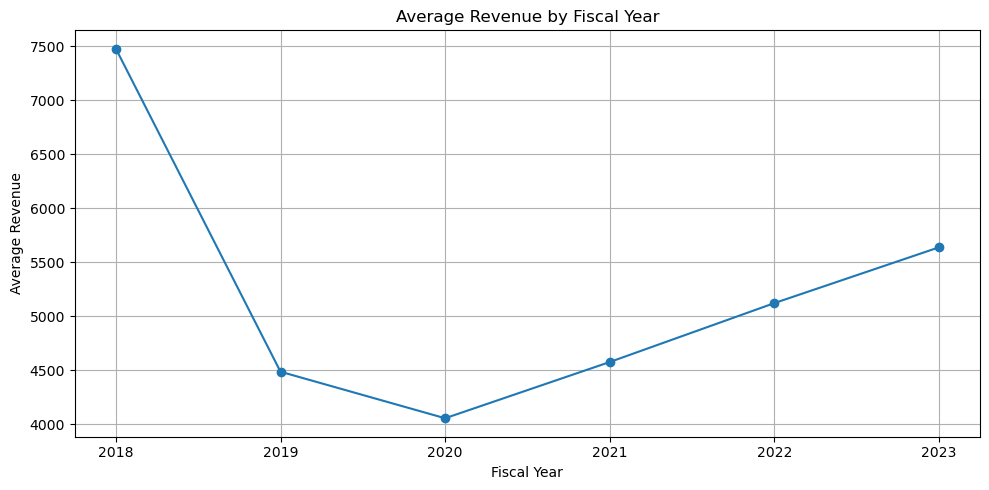

This graph shows the trend in average revenue by fiscal year. This rise in revenue could mean growing sales for companies in the dataset, suggesting overall market growth.


In [29]:
import matplotlib.pyplot as plt

# calculate average revenue by fiscal year
avg_revenue = funda.groupby('fyear')['revenue'].mean()

# plotting the average revenue trend
plt.figure(figsize=(10, 5))
plt.plot(avg_revenue.index, avg_revenue.values, marker='o')
plt.title('Average Revenue by Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Average Revenue')
plt.xticks(avg_revenue.index)  # Show all fiscal years on the x-axis
plt.grid()
plt.tight_layout()
plt.show()

print('This graph shows the trend in average revenue by fiscal year. This rise in revenue could mean \
growing sales for companies in the dataset, suggesting overall market growth.')

In [30]:
# Evaluation (do not change this cell)
print('The answer to this question could be simple or complicated;\n'
      'You are working with a copyrighted dataset in this assignment,\n'
      'so feel free to get creative.\n'
      'For example, you can use graphs to visualize some industry trends, \n'
      'create another financial ratio, or just something really simple.')

The answer to this question could be simple or complicated;
You are working with a copyrighted dataset in this assignment,
so feel free to get creative.
For example, you can use graphs to visualize some industry trends, 
create another financial ratio, or just something really simple.


# Part 2: Numpy (25 points)

You are working with sales data from a grocery store. Each row in the data represents sales from a specific product category (e.g., produce, fruit, meat, etc.), and each column represents weekly sales in dollars for the last 6 weeks. 

1. Set the random seed to 1500 and generate an 6x6 array of random sales figures , where each number represents weekly sales for a product category. The sales figures should range between 200 and 5000 dollars (inclusive of both numbers). Store this array in a variable named `sales_data`.

In [31]:
# modify and uncomment the below lines of code: - can just copy the solution for this!!!!!!
import numpy as np
np.random.seed(1500)
sales_data = np.random.randint(200, 5001, (6, 6))
print(sales_data)

[[3547  393 1093  650  881 2647]
 [2907 2585 2883 3407 1279  761]
 [ 687 2358 1690 2541 2811 3772]
 [4795 4347 4812  547  392 1735]
 [ 344 3612 2656 1012 3733  391]
 [2736 1742 2500 4975 1847 2224]]


In [32]:
# Evaluation (do not change this cell)
test=sales_data[1]==[2907, 2585, 2883, 3407, 1279,  761]
np.unique(test)[0]==True

True

2. Create an array named `recent_weekly_avg` to store the mean sales of the last three weeks (the last three columns) for the first four product categories (the first four rows) from the `sales_data` array.

In [33]:
recent_weekly_avg = sales_data[:4, -3:].mean(axis=1)
print(recent_weekly_avg)

[1392.66666667 1815.66666667 3041.33333333  891.33333333]


In [34]:
# Evaluation (do not change this cell)
print(isinstance(recent_weekly_avg, np.ndarray))
print(np.isclose(recent_weekly_avg[1],1815.66666667, atol=1e-5))

True
True


3. Create a variable named `mid_range_sales` to store the sum of all sales in the interval [1000, 3500) that occurred in the last four weeks (the last four columns) of the `sales_data` array.

In [35]:
mid_range_sales = sales_data[:, -4:][(sales_data[:, -4:] >= 1000) & (sales_data[:, -4:] < 3500)].sum()
print(mid_range_sales)

30325


In [36]:
# Evaluation (do not change this cell)
print(30000<=mid_range_sales<=31000)

True


4. Create a new array named `adjusted_sales_data` from `sales_data` where:

- Sales greater than 3000 are replaced with 1.
- Sales between 1500 (exclusive) and 3000 (inclusive) are replaced with 2.
- Sales between 500 (exclusive) and 1500 (inclusive) are replaced with 3.
- Sales less than 500 are replaced with 4.

In [37]:
adjusted_sales_data = np.where(sales_data > 3000, 1,
                      np.where((sales_data > 1500) & (sales_data <= 3000), 2,
                      np.where((sales_data > 500) & (sales_data <= 1500), 3, 4)))

In [38]:
# Evaluation (do not change this cell)
print(adjusted_sales_data)
adjusted_sales_data[1,2:4]==[2, 1]

[[1 4 3 3 3 2]
 [2 2 2 1 3 3]
 [3 2 2 2 2 1]
 [1 1 1 3 4 2]
 [4 1 2 3 1 4]
 [2 2 2 1 2 2]]


array([ True,  True])

5. Add a new column to `adjusted_sales_data`. The new column is stored the below array `new_col`.
   Hint: You may need to reshape `new_col` to shape (6,1) first. 

In [39]:
new_col=np.array([[1,1,1,2,2,2]]) 

In [40]:
adjusted_sales_data=np.concatenate((adjusted_sales_data,new_col.reshape(6,1)),axis=1)
print(adjusted_sales_data)

[[1 4 3 3 3 2 1]
 [2 2 2 1 3 3 1]
 [3 2 2 2 2 1 1]
 [1 1 1 3 4 2 2]
 [4 1 2 3 1 4 2]
 [2 2 2 1 2 2 2]]


In [41]:
# Evaluation (do not change this cell)
print(adjusted_sales_data.ndim==2)
print(np.unique(adjusted_sales_data[:,-1]==new_col))

True
[ True]
